In [ ]:
!pip install sktime

In [ ]:
!pip install sktime[all_extras]

In [1]:
import sktime
sktime.__version__

'0.20.1'

In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Coal Consumption.csv",index_col=0)
df.head()

,Amount
Month,
1/1/1990,16.50
2/1/1990,15.17
3/1/1990,12.75
4/1/1990,12.31
5/1/1990,8.34


In [4]:
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

In [5]:
type(idx)

pandas.core.indexes.period.PeriodIndex

In [ ]:
df.head()

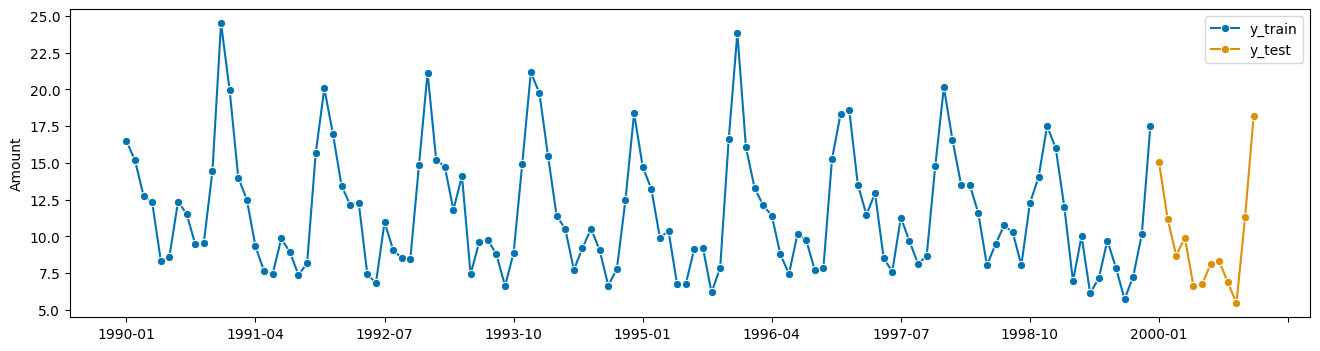

In [6]:
y = df['Amount']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()

In [7]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12'],
            dtype='period[M]', is_relative=False)

**ETS fitting**

0.9717274758307863


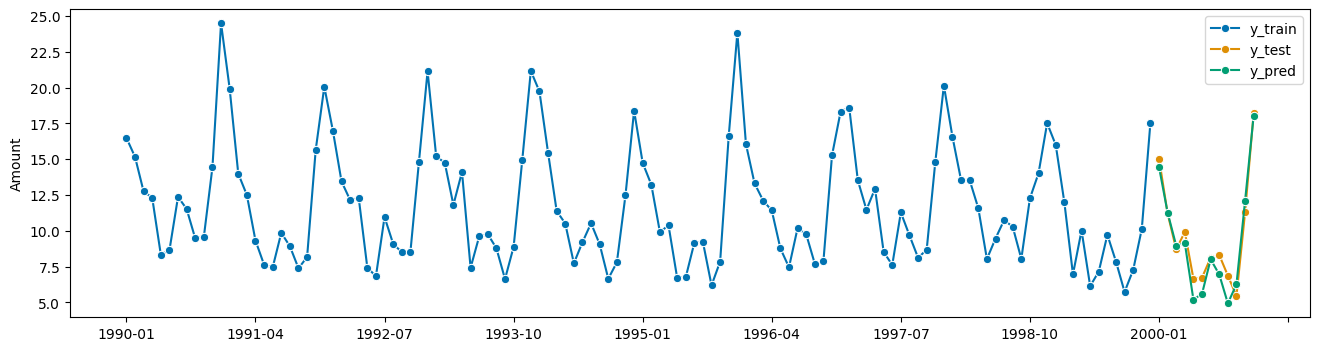

In [14]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=True))

In [15]:
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                 Amount   No. Observations:                  120
Model:                       ETS(MNA)   Log Likelihood                -183.868
Date:                Mon, 17 Jul 2023   AIC                            399.737
Time:                        07:38:54   BIC                            444.337
Sample:                    01-31-1990   HQIC                           417.849
                         - 12-31-1999   Scale                            0.010
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.2778      0.059      4.679      0.000       0.161       0.394
smoothing_seasonal   7.222e-05        nan        nan        nan         nan         nan
initial_level   

### Auto ARIMA

In [ ]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, d=0, max_p=3, max_q=3, suppress_warnings=True, trace=True)
forecaster.fit(y_train)

In [10]:
print(forecaster.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -229.755
Date:                              Mon, 17 Jul 2023   AIC                            469.510
Time:                                      13:27:30   BIC                            483.447
Sample:                                  01-31-1990   HQIC                           475.170
                                       - 12-31-1999                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0225      0.039      0.573      0.567      -0.054       0.099
ar.L1          0.43

3.2902491588078426


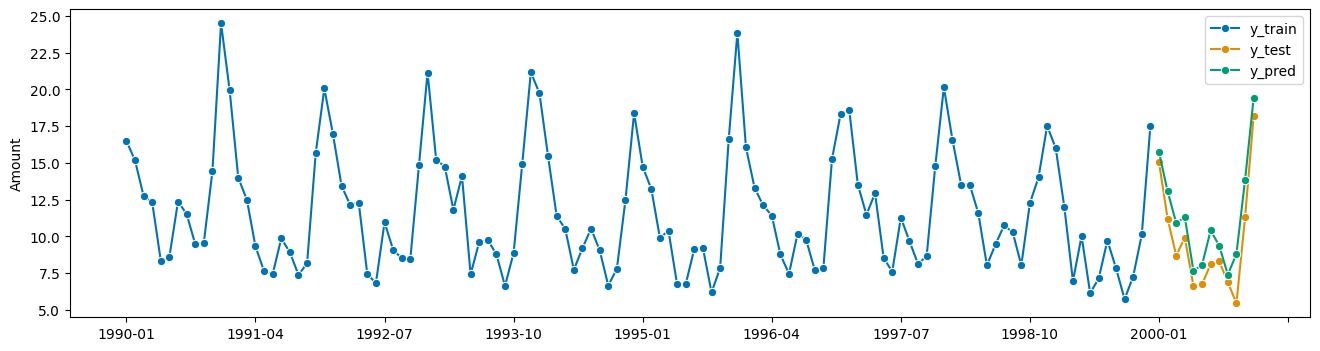

In [11]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

### BUNDESBANK-BBK01_WT5511.csv

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/BUNDESBANK-BBK01_WT5511.csv", index_col=0)
df.head()

,Value
Date,
30-04-1968,39.10
31-05-1968,42.00
30-06-1968,40.95
31-07-1968,38.90
31-08-1968,39.85


In [22]:
idx = pd.to_datetime( df.index, dayfirst=True ).to_period("M")
df.index = idx

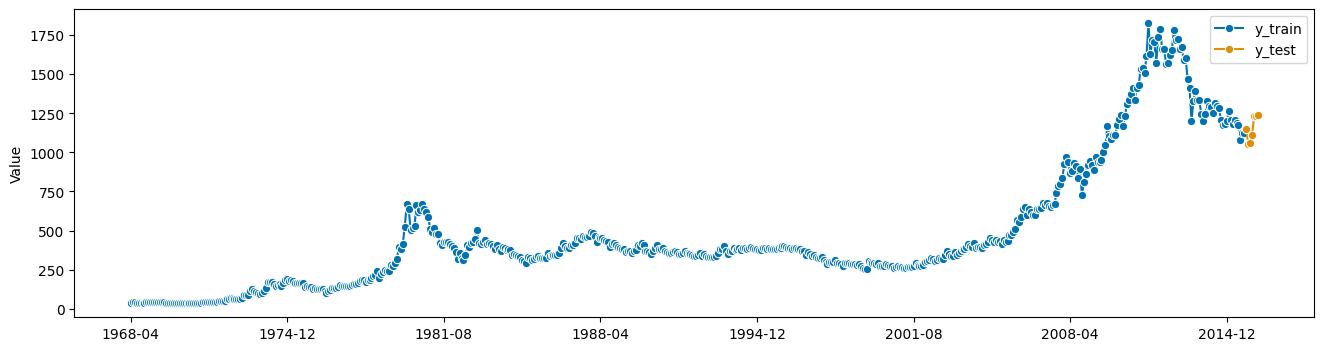

In [23]:
y = df['Value']
y_train, y_test = temporal_train_test_split(y, test_size=7)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

In [24]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
             '2016-04'],
            dtype='period[M]', is_relative=False)

12013.392761002773


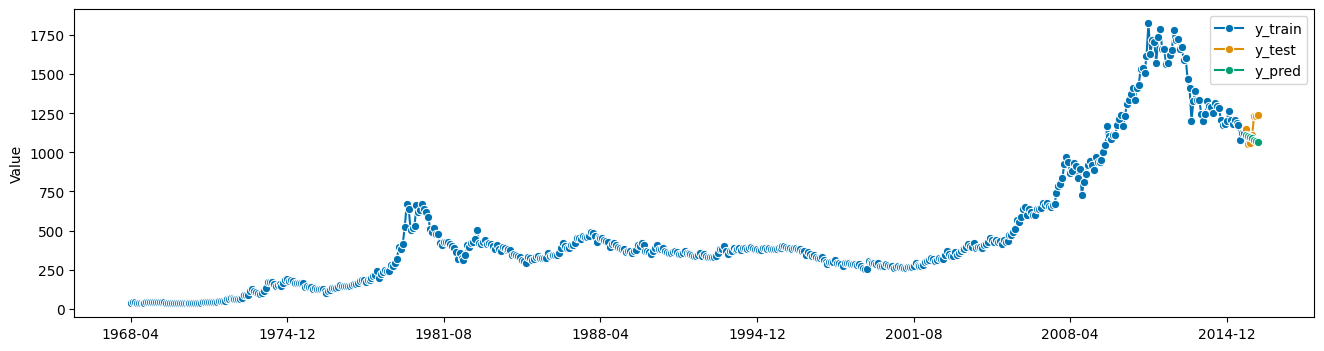

In [25]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

In [26]:
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                  Value   No. Observations:                  570
Model:                       ETS(MAN)   Log Likelihood               -2489.868
Date:                Mon, 17 Jul 2023   AIC                           4989.735
Time:                        09:43:01   BIC                           5011.463
Sample:                    04-30-1968   HQIC                          4998.213
                         - 09-30-2015   Scale                            0.003
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.044     22.478      0.000       0.913       1.087
smoothing_trend     0.0495      0.019      2.564      0.010       0.012       0.087
initial_level      38.7996      

### AirPassengers.csv

In [39]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/AirPassengers.csv",index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [40]:
idx = pd.to_datetime( df.index,format="%Y-%m").to_period("M")
df.index = idx

In [ ]:
df

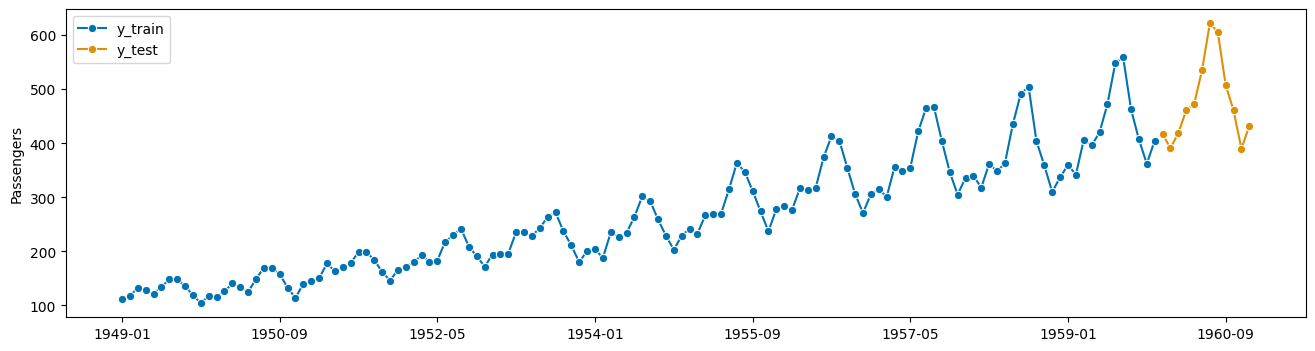

In [42]:
y = df['Passengers']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()

651.5652185783621


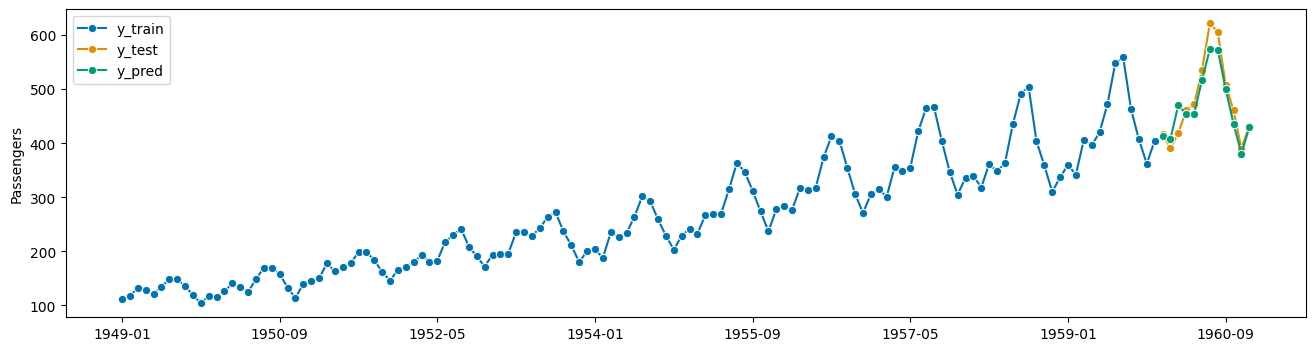

In [43]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

In [44]:
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:             Passengers   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -469.385
Date:                Mon, 17 Jul 2023   AIC                            974.770
Time:                        09:59:01   BIC                           1026.661
Sample:                    01-31-1949   HQIC                           995.856
                         - 12-31-1959   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.083     12.008      0.000       0.837       1.163
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

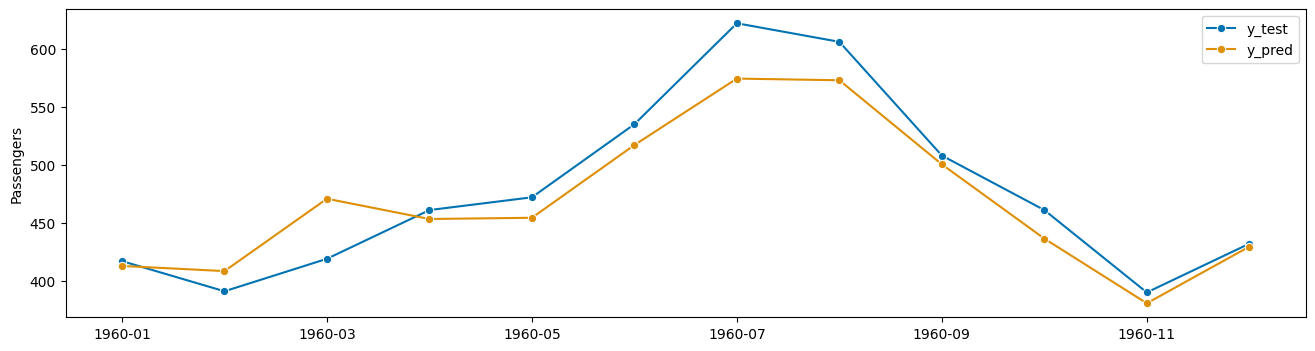

In [46]:
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])
plt.show()

### NYSE

In [ ]:
!pip install ISLP

In [27]:
from ISLP import load_data

NYSE = load_data('NYSE')
print(NYSE.columns)


Index(['day_of_week', 'DJ_return', 'log_volume', 'log_volatility', 'train'], dtype='object')


In [28]:
idx = pd.to_datetime( NYSE.index,format="%Y-%m-%d").to_period("D")
NYSE.index = idx

In [24]:
(y.shape, y_train.shape, y_test.shape)

((6051,), (4281,), (1770,))

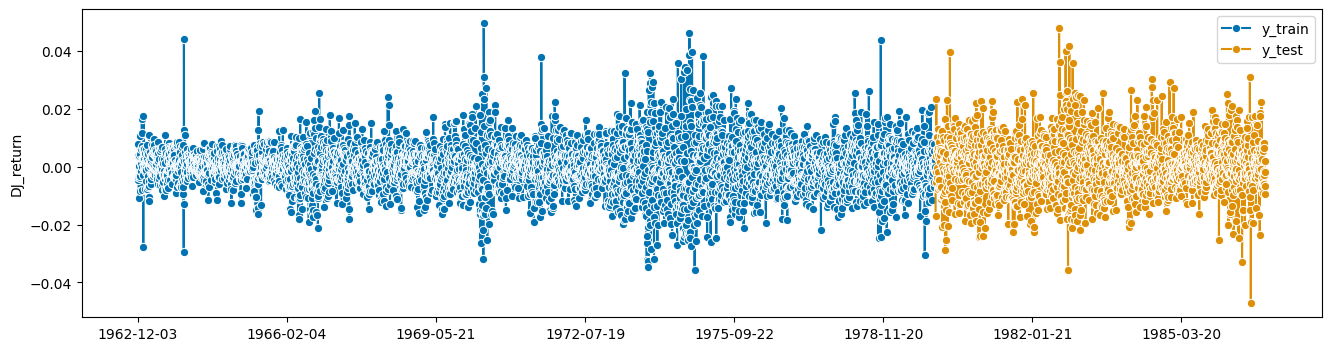

In [25]:
y = NYSE['DJ_return']
y_train, y_test = temporal_train_test_split(y, test_size=1770)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

/usr/local/lib/python3.10/dist-packages/sktime/forecasting/base/adapters/_statsmodels.py:54: UserWarning: Warning: time series is not strictly positive, multiplicative components are ommitted
  self._fit_forecaster(y, X)


8.564626991790344e-05


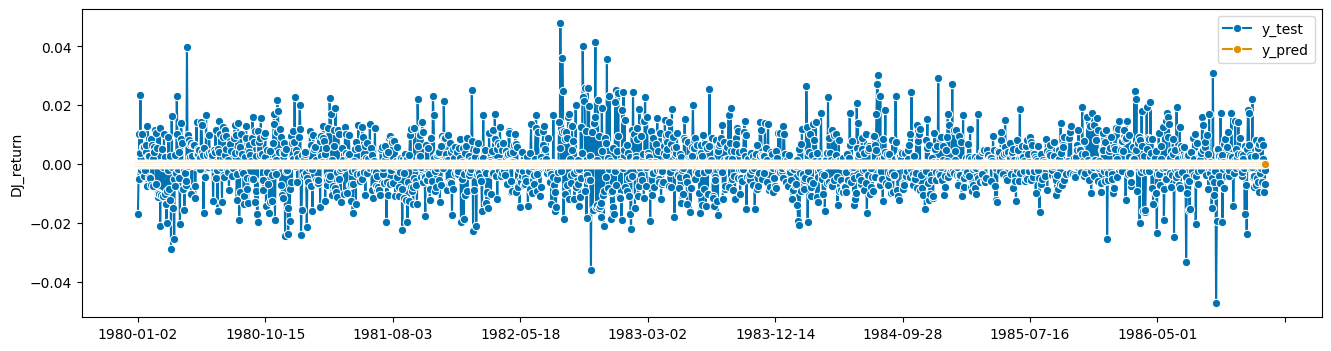

In [26]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
forecaster = AutoETS(auto=True, sp=5)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))